In [1]:
import pandas as pd
import numpy as np
import copy
import functools
import itertools
import numpy as np
from itertools import product
from functools import partial
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import warnings

warnings.filterwarnings('ignore')

from CI import compute_V

### Figure 2

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
n = 500
B = 10000
eps_var = 1/2**2
X = np.linspace(0, 1, num=n, endpoint=True).reshape((-1, 1))
def simulation_figure_2(random_seed):
    np.random.seed(random_seed)
    y = np.zeros(shape=(n,1))
    y[(X>=0.35) & (X<=0.65)] = 0.7
    y[(X>=0.45) & (X<=0.55)] = 1.4
    y = (y+ np.random.normal(0, eps_var, size = (n, 1))).ravel()                                                      
    bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes = 5), n_estimators=B, random_state=random_seed)
    bagging.fit(X, y)
    _, V_J, _, V_IJ = compute_V(bagging, X, X)
    return V_J, V_IJ

In [6]:
%%time
n_process = 100
n_parallel = 100
random_seeds = list(range(n_parallel))
with Pool(processes = n_process) as pool:
    collection_source = pool.map(simulation_figure_2, random_seeds)

collection_source = np.array(collection_source)

CPU times: user 2.32 s, sys: 3.1 s, total: 5.42 s
Wall time: 9min 10s


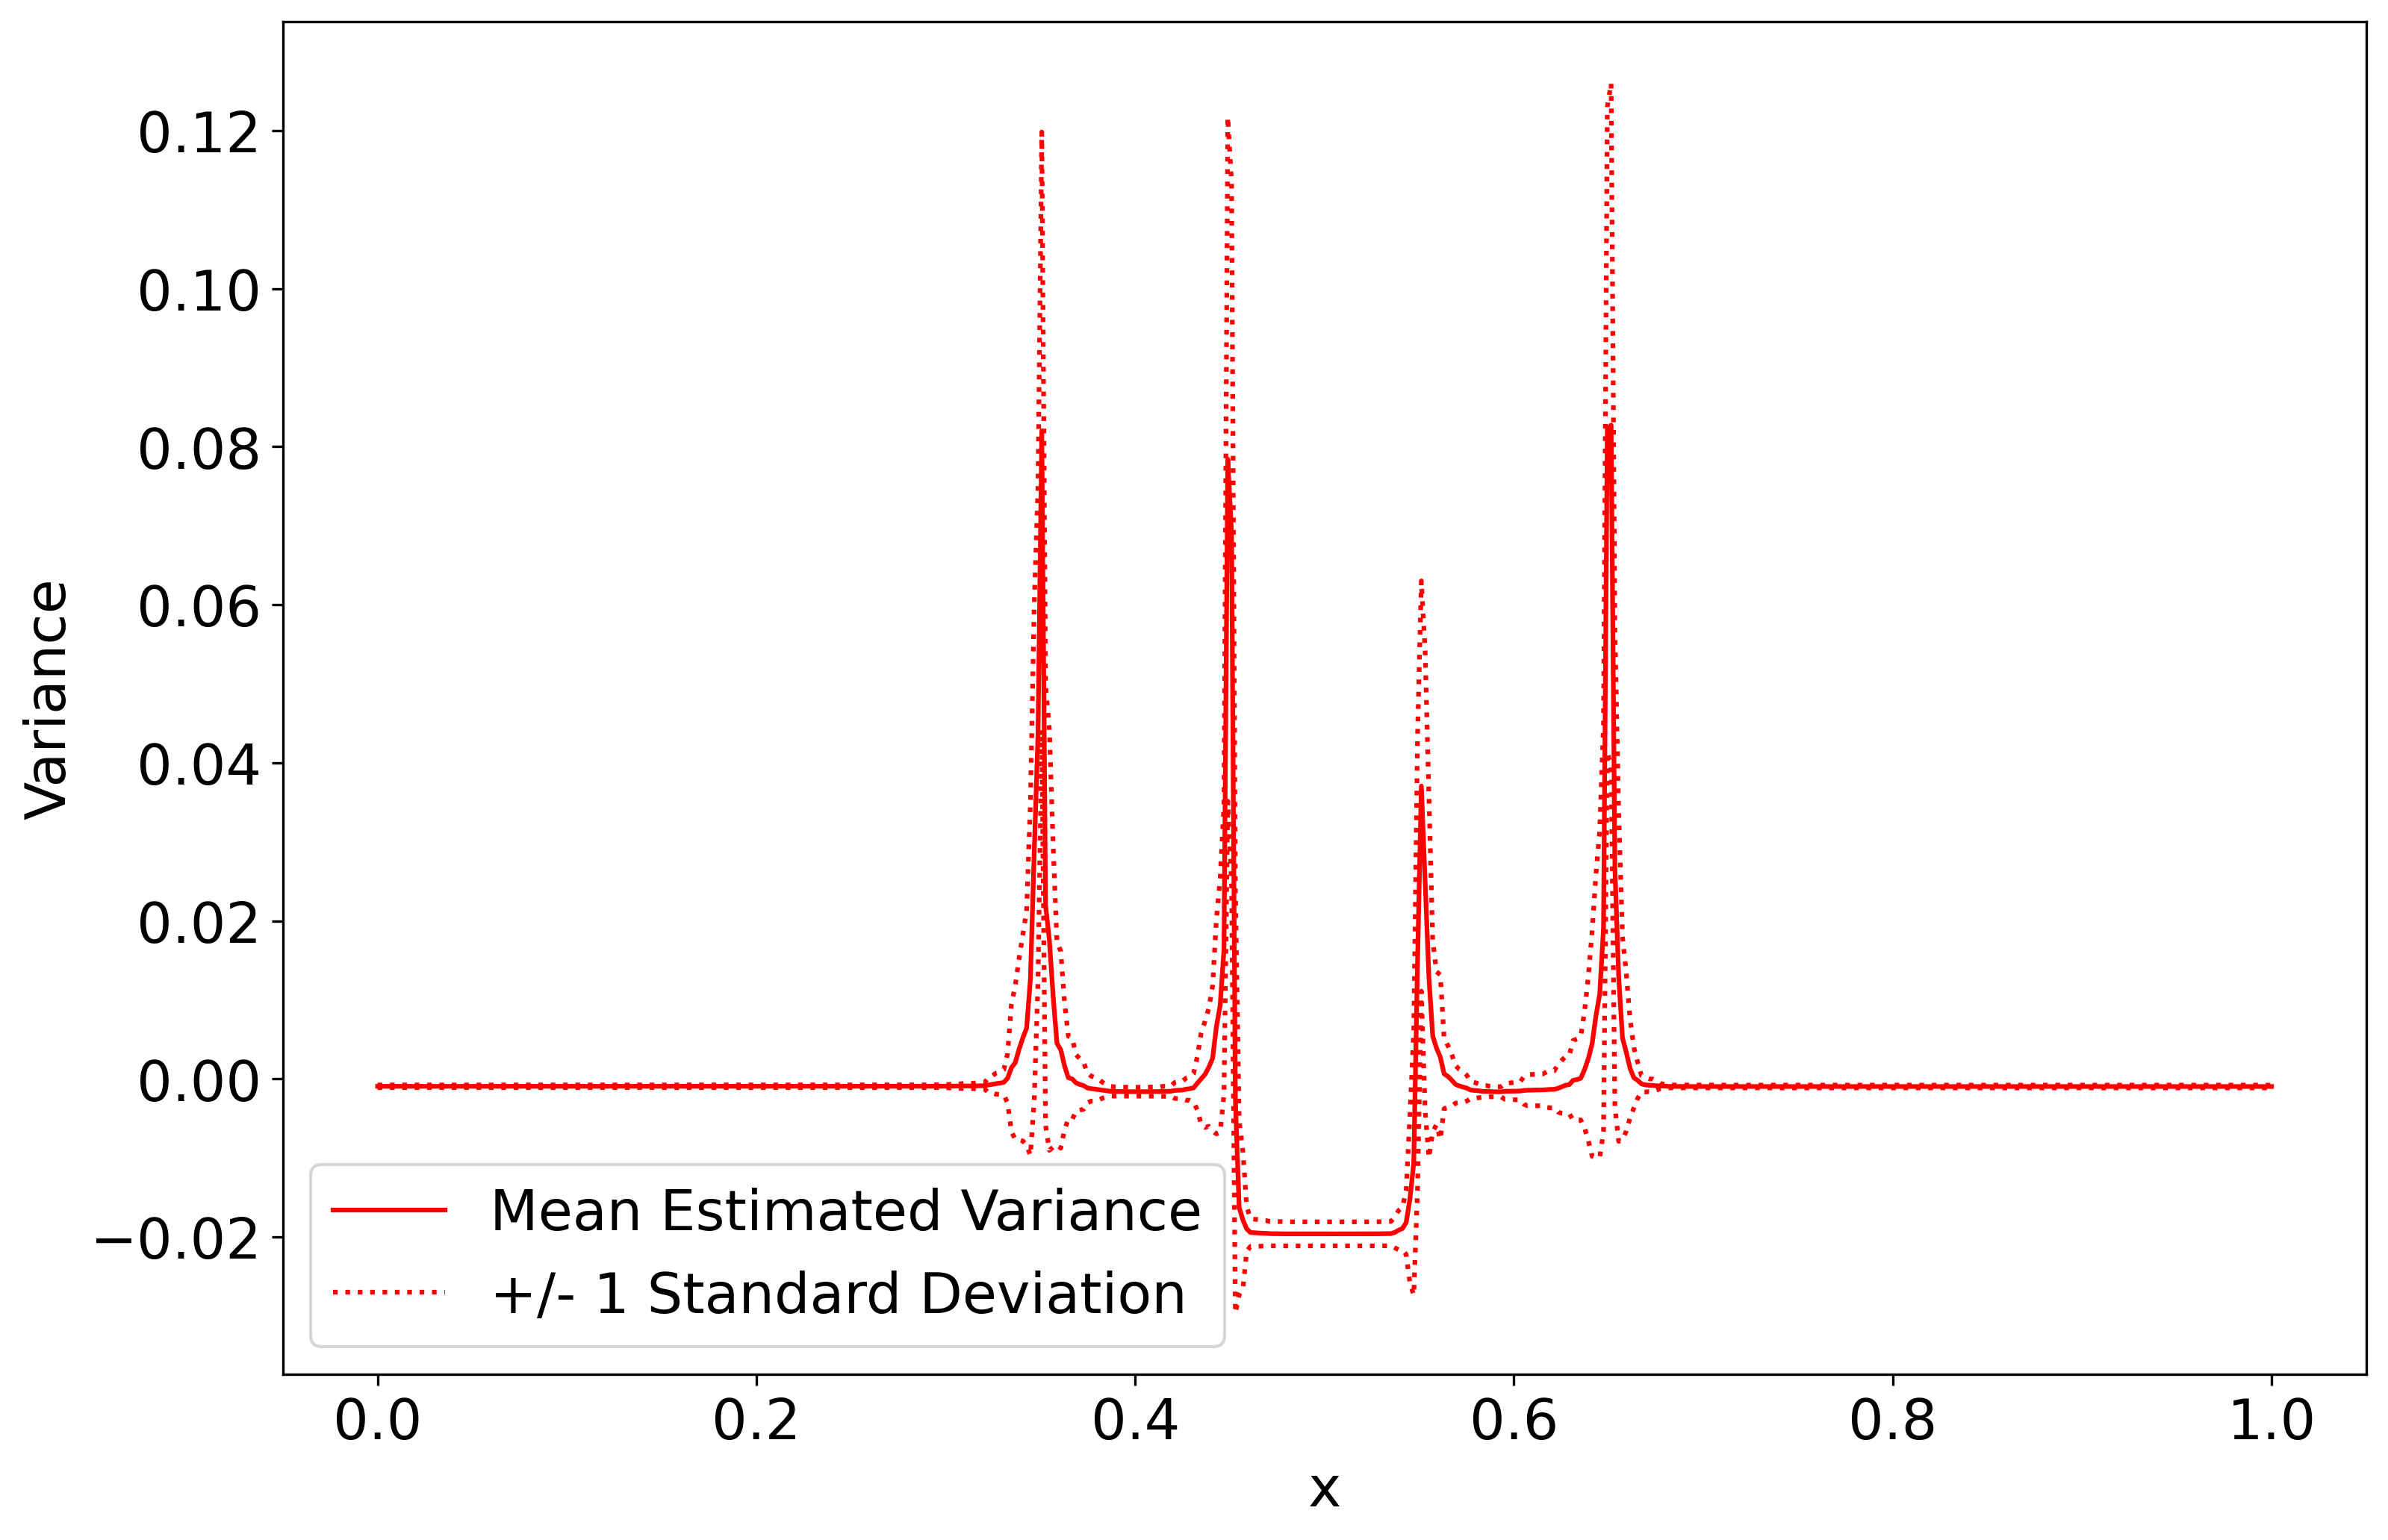

In [8]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 300)
X = np.linspace(0, 1, num=n, endpoint=True).reshape((-1, 1))
mean = collection_source[:, 0, :].mean(axis = 0)
std = collection_source[:, 0, :].std(axis = 0)
ax.plot(X.ravel(), mean.ravel(), 'r-', label = 'Mean Estimated Variance')
ax.plot(X.ravel(), mean.ravel() + std.ravel(), 'r:', label = '+/- 1 Standard Deviation')
ax.plot(X.ravel(), mean.ravel() - std.ravel(), 'r:')
plt.xlabel('x')
plt.ylabel('Variance') 
plt.legend()
plt.savefig('../figures/figure2_J.pdf', dpi = 300)
plt.show()

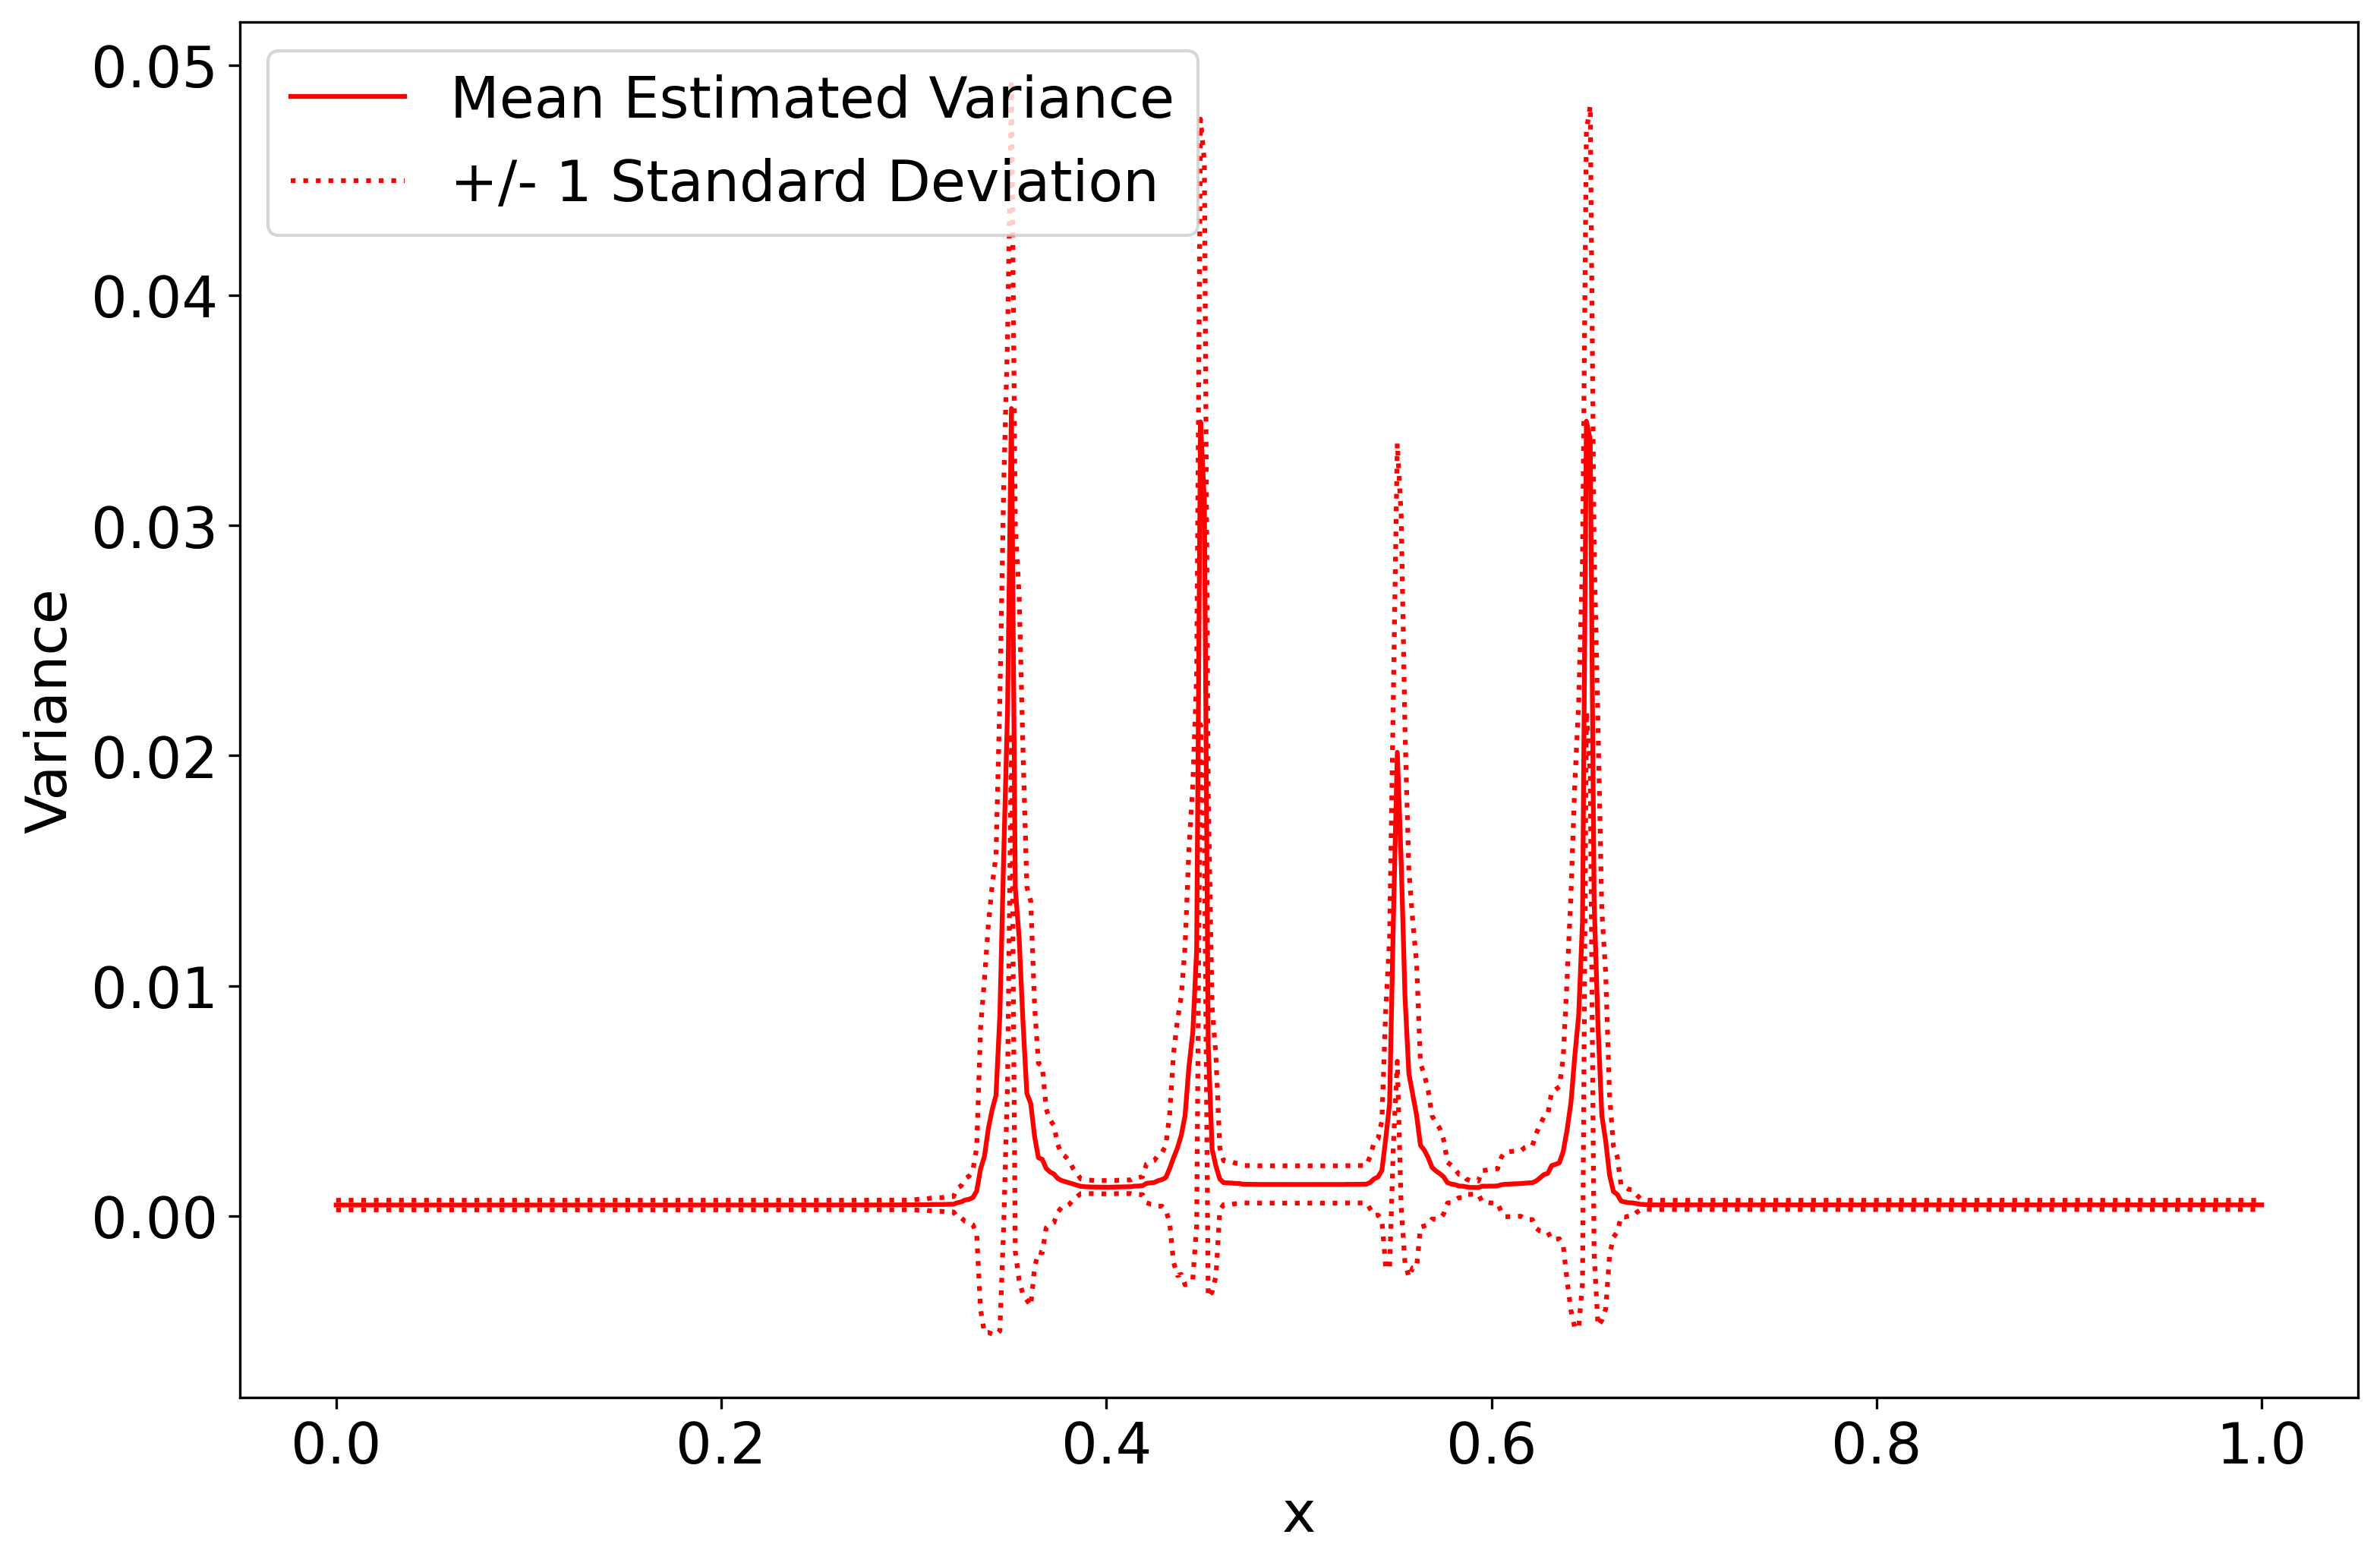

In [9]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 300)
X = np.linspace(0, 1, num=n, endpoint=True).reshape((-1, 1))
mean = collection_source[:, 1, :].mean(axis = 0)
std = collection_source[:, 1, :].std(axis = 0)
ax.plot(X.ravel(), mean.ravel(), 'r-', label = 'Mean Estimated Variance')
ax.plot(X.ravel(), mean.ravel() + std.ravel(), 'r:', label = '+/- 1 Standard Deviation')
ax.plot(X.ravel(), mean.ravel() - std.ravel(), 'r:')
plt.xlabel('x')
plt.ylabel('Variance') 
plt.legend()
plt.savefig('../figures/figure2_IJ.pdf', dpi = 300)
plt.show()

### 50K for J

In [10]:
n = 500
B = 50000
eps_var = 1/2**2
X = np.linspace(0, 1, num=n, endpoint=True).reshape((-1, 1))
def simulation_figure_2(random_seed):
    np.random.seed(random_seed)
    y = np.zeros(shape=(n,1))
    y[(X>=0.35) & (X<=0.65)] = 0.7
    y[(X>=0.45) & (X<=0.55)] = 1.4
    y = (y+ np.random.normal(0, eps_var, size = (n, 1))).ravel()                                                      
    bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes = 5), n_estimators=B, random_state=random_seed)
    bagging.fit(X, y)
    _, V_J, _, V_IJ = compute_V(bagging, X, X)
    return V_J, V_IJ

In [11]:
%%time
n_process = 100
n_parallel = 100
random_seeds = list(range(n_parallel))
with Pool(processes = n_process) as pool:
    collection_source = pool.map(simulation_figure_2, random_seeds)

collection_source = np.array(collection_source)

CPU times: user 2.31 s, sys: 3.13 s, total: 5.45 s
Wall time: 8min 58s


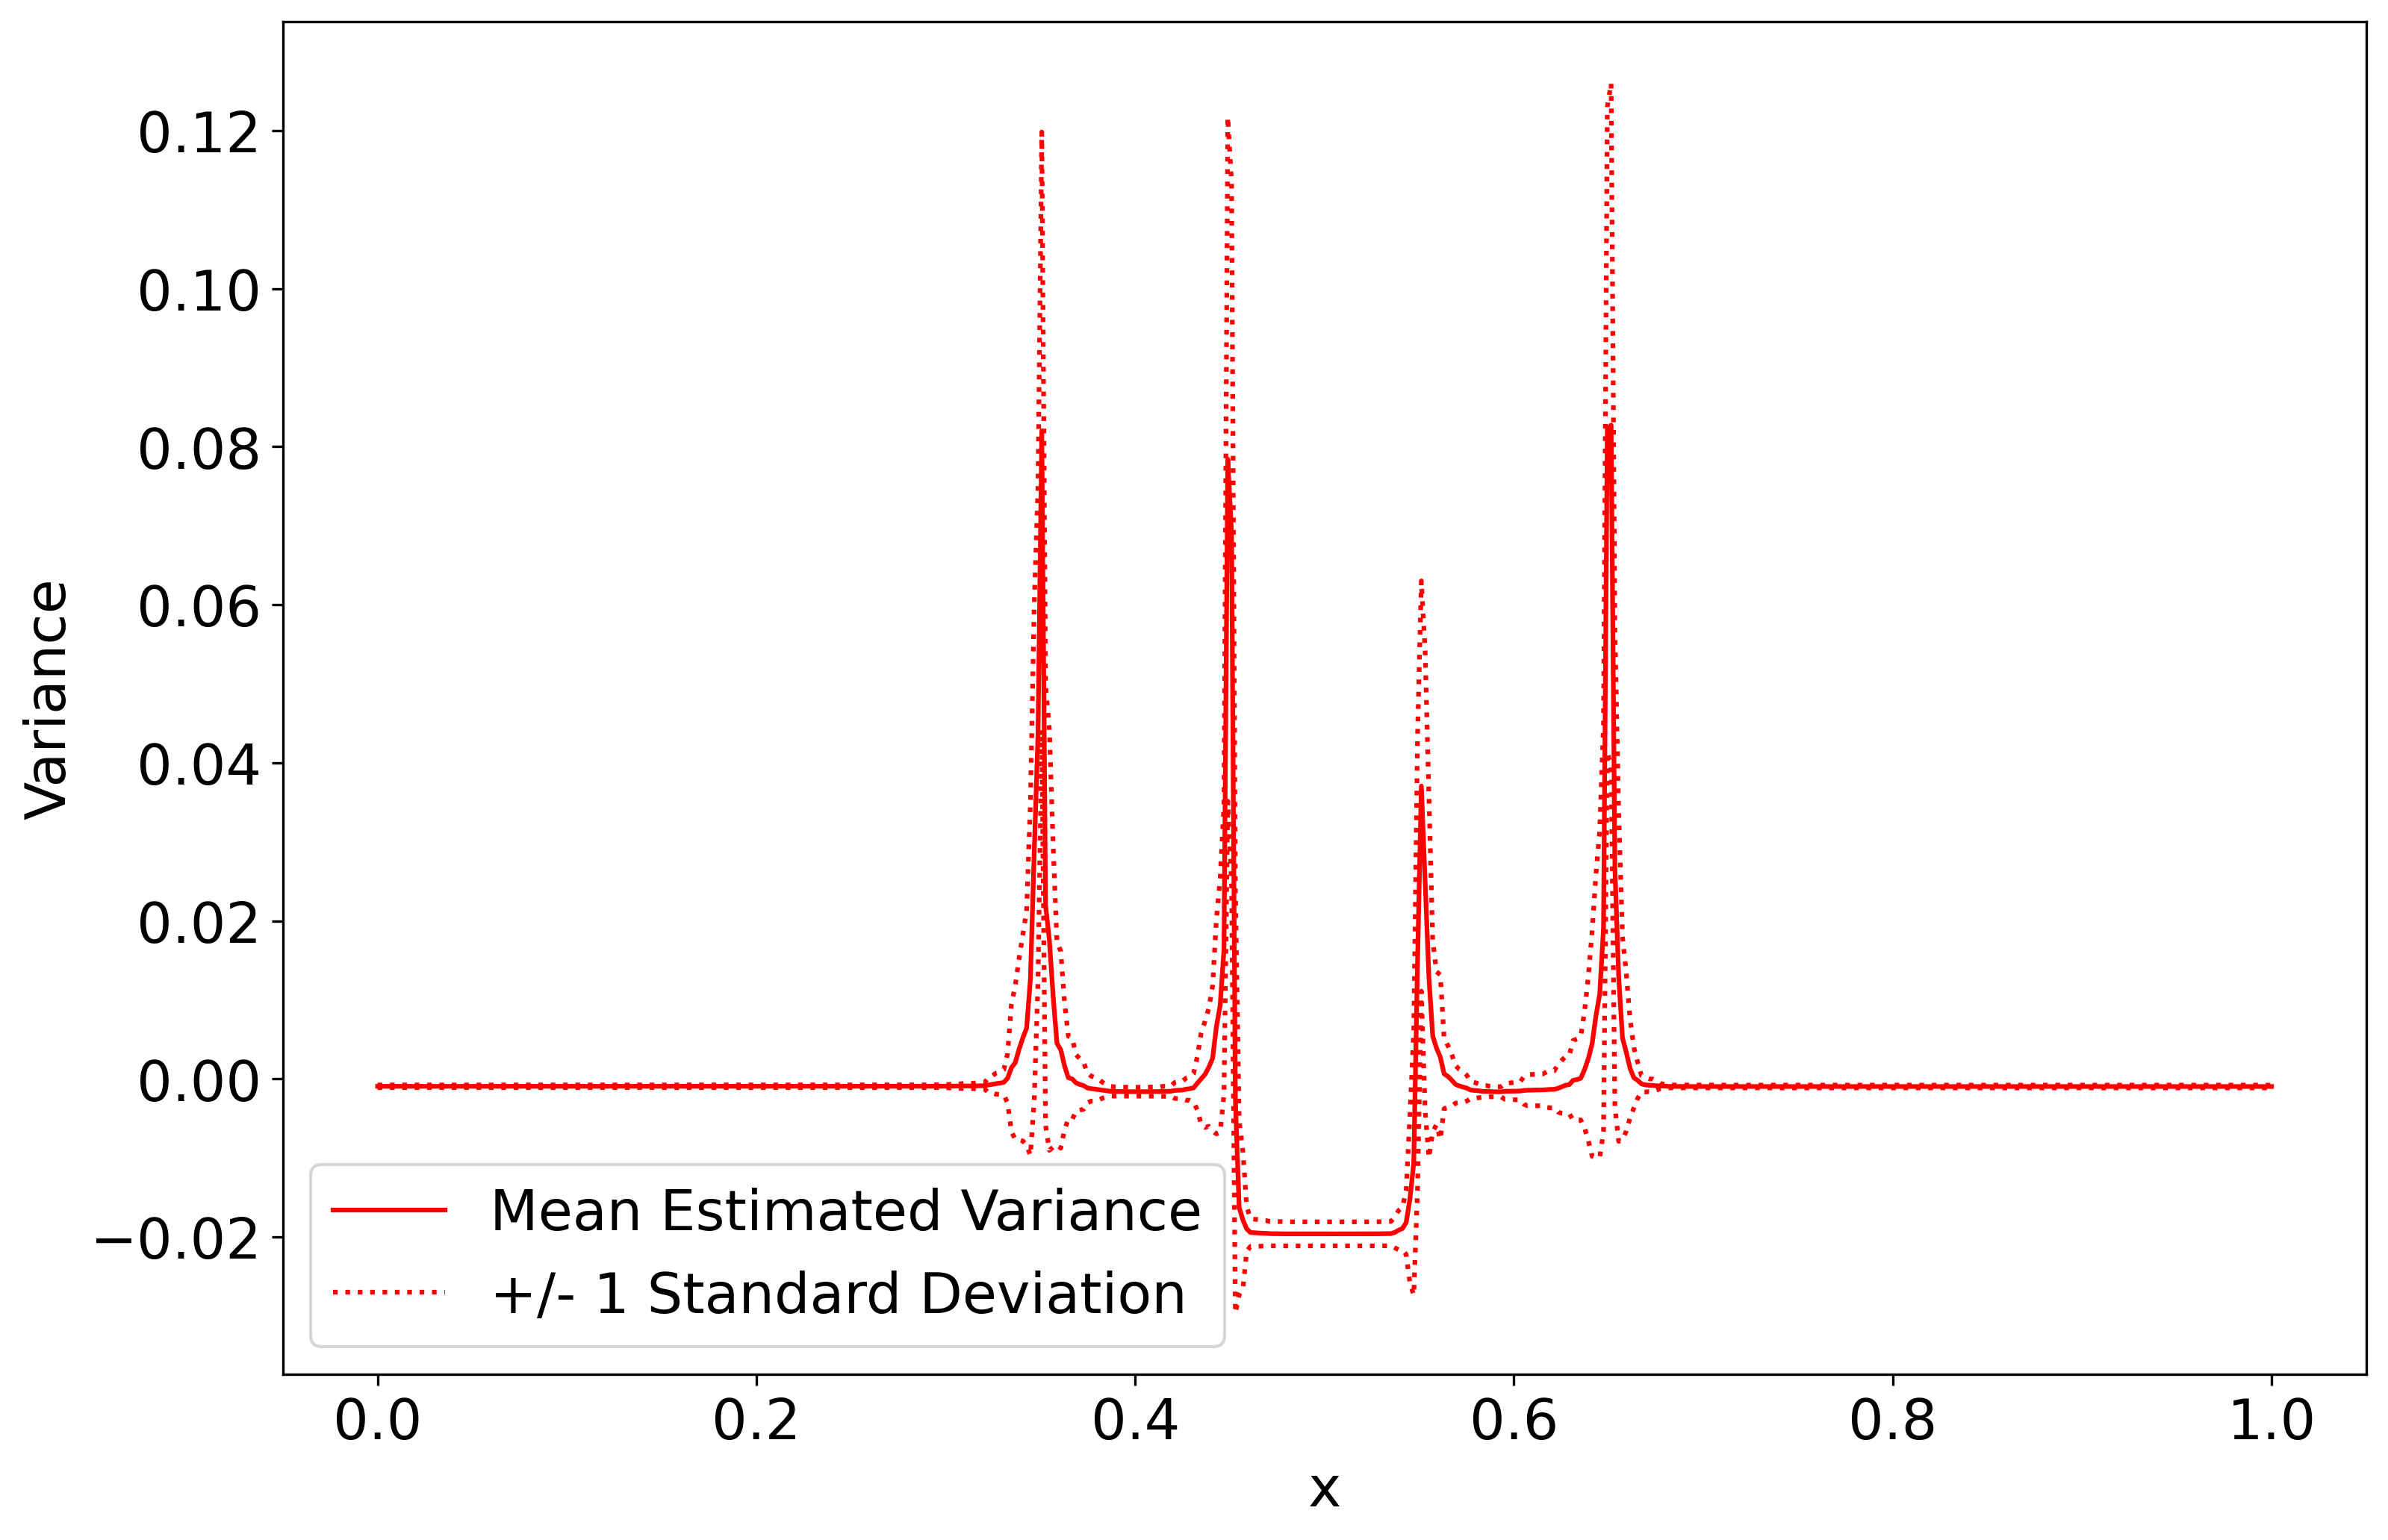

In [12]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 300)
X = np.linspace(0, 1, num=n, endpoint=True).reshape((-1, 1))
mean = collection_source[:, 0, :].mean(axis = 0)
std = collection_source[:, 0, :].std(axis = 0)
ax.plot(X.ravel(), mean.ravel(), 'r-', label = 'Mean Estimated Variance')
ax.plot(X.ravel(), mean.ravel() + std.ravel(), 'r:', label = '+/- 1 Standard Deviation')
ax.plot(X.ravel(), mean.ravel() - std.ravel(), 'r:')
plt.xlabel('x')
plt.ylabel('Variance') 
plt.legend()
plt.savefig('../figures/figure2_J_50K.pdf', dpi = 300)
plt.show()